For the full example to run the backtesting, refer to [gridtrading.ipynb](https://github.com/nkaz001/hftbacktest/blob/master/hftbacktest/examples/gridtrading.ipynb). This file shows how to trade multiple pairs. For more details of trading multiple assets, please see [Making Multiple Markets - Introduction](https://hftbacktest.readthedocs.io/en/latest/tutorials/Making%20Multiple%20Markets%20-%20Introduction.html).

Ran on June 18, 2024, using May 2024 data. Assets onboarded before May 1, 2024, are selected, excluding BTC and ETH.

Since the latest tick size is used for backtesting, if the tick size has changed during the backtesting period, the results may be incorrect. Accurate backtesting requires historical tick size data or estimating the tick size daily based on the available data.

## With the highest maker rebates of 0.005%.

In [ ]:
import pandas as pd
import re
import json
import os.path
from matplotlib import pyplot as plt

out_path = './out'
sel_pairs = []
sel_pairs_total_equity = None

with open('tickers_256.json', 'r') as f:
    tickers = json.load(f)

for i, symbol in enumerate(tickers.keys()):
    df = pd.read_csv(os.path.join(out_path, f'{symbol}0.csv'))
    df.index = pd.to_datetime(df['timestamp'])
    equity = df['balance'] + df['position'] * df['mid_price'] - df['fee']

    equity_5min = equity.resample('5min').last()

    notional_trade_value = df['position'].diff().abs().rolling('1d').sum().resample('1d').last() * df['mid_price'].resample('1d').last()
    # order_qty is set to approximately $100.
    approx_num_trades = notional_trade_value / 100
    avg_approx_num_trades = approx_num_trades.mean()

    # Due to size limitations, individual equity curves are cleared in the output.
    fig = plt.figure(i, figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.set_title(f'{symbol}, approximate number of average daily trades: {avg_approx_num_trades:.0f}')
    ax.set_ylabel('Equity $')
    ax.plot(equity_5min)
    ax.legend(['Equity'])
    ax_pos = ax.twinx()
    ax_pos.set_ylabel('Position Qty')
    ax_pos.plot(df['position'].resample('5min').last(), 'gray', alpha=0.5)
    ax_pos.legend(['Position Qty'])

    # Selects only the positive ones, we will test this set in different months and the forward month as well.
    if equity.iloc[-1] > 0:
        sel_pairs.append(symbol)
        if sel_pairs_total_equity is None:
            sel_pairs_total_equity = equity_5min
        else:
            sel_pairs_total_equity += equity_5min

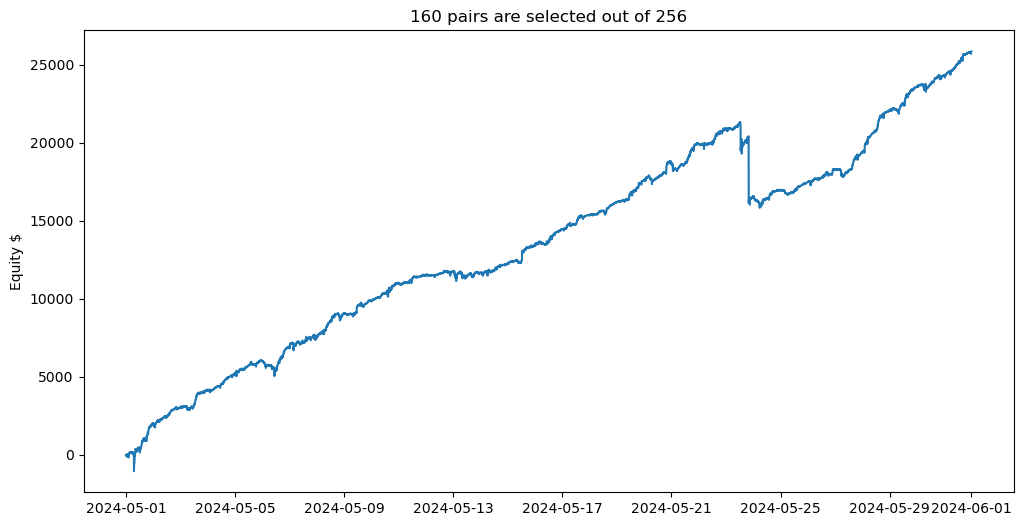

In [2]:
plt.figure(figsize=(12, 6))
plt.title(f'{len(sel_pairs)} pairs are selected out of {len(tickers)}')
plt.ylabel('Equity $')
plt.plot(sel_pairs_total_equity)

## With the zero maker fee 0.0%

In [ ]:
sel_pairs = []
sel_pairs_total_equity = None

for i, symbol in enumerate(tickers.keys()):
    df = pd.read_csv(os.path.join(out_path, f'{symbol}0.csv'))
    df.index = pd.to_datetime(df['timestamp'])
    equity = df['balance'] + df['position'] * df['mid_price']

    equity_5min = equity.resample('5min').last()

    notional_trade_value = df['position'].diff().abs().rolling('1d').sum().resample('1d').last() * df['mid_price'].resample('1d').last()
    # order_qty is set to approximately $100.
    approx_num_trades = notional_trade_value / 100
    avg_approx_num_trades = approx_num_trades.mean()

    # Due to size limitations, individual equity curves are cleared in the output.
    fig = plt.figure(i, figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.set_title(f'{symbol}, approximate number of average daily trades: {avg_approx_num_trades:.0f}')
    ax.set_ylabel('Equity $')
    ax.plot(equity_5min)
    ax.legend(['Equity'])
    ax_pos = ax.twinx()
    ax_pos.set_ylabel('Position Qty')
    ax_pos.plot(df['position'].resample('5min').last(), 'gray', alpha=0.5)
    ax_pos.legend(['Position Qty'])

    # Selects only the positive ones, we will test this set in different months and the forward month as well.
    if equity.iloc[-1] > 0:
        sel_pairs.append(symbol)
        if sel_pairs_total_equity is None:
            sel_pairs_total_equity = equity_5min
        else:
            sel_pairs_total_equity += equity_5min

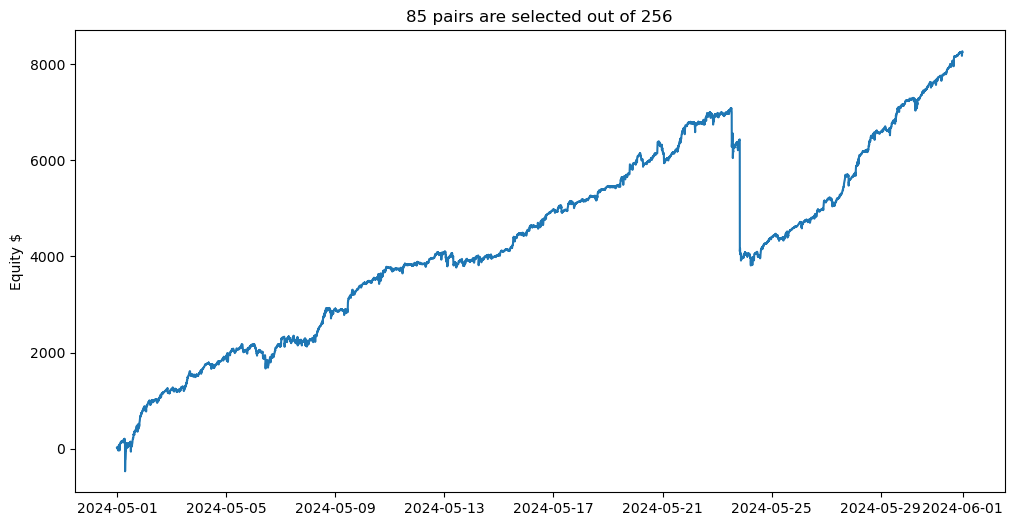

In [6]:
plt.figure(figsize=(12, 6))
plt.title(f'{len(sel_pairs)} pairs are selected out of {len(tickers)}')
plt.ylabel('Equity $')
plt.plot(sel_pairs_total_equity)